## We import the required bookstores

In [22]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## We visualize the dataset

In [23]:
df_train = pd.read_csv("sent_train.csv")
df_valid = pd.read_csv("sent_valid.csv")

## Prepoccesing

In [24]:
sentiments = {"LABEL_0": "Bearish", "LABEL_1": "Bullish", "LABEL_2": "Neutral"}

In [25]:
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'http\S+', '', text)  #delete urls
    text = re.sub(r'[^a-zA-Z\s]', '', text) #delete spacial characters
    return text.strip()

In [ ]:
df_train['text'] = df_train['text'].astype(str).apply(clean_text)#Asegurar que todos los elementos sean texto
df_valid['text'] = df_valid['text'].astype(str).apply(clean_text)

## Training

In [27]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_train['text'])

X_train = tokenizer.texts_to_sequences(df_train['text'])
X_valid = tokenizer.texts_to_sequences(df_valid['text'])

## Padding

In [ ]:
max_length = 50
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_valid = pad_sequences(X_valid, maxlen=max_length, padding='post')

## Label codifications

In [29]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train['label'])
y_valid = label_encoder.transform(df_valid['label'])

## Labels Enteros

In [30]:
#y_train = to_categorical(y_train, num_classes=3)
#y_valid = to_categorical(y_valid, num_classes=3)

In [31]:
y_train = label_encoder.fit_transform(df_train['label'])
y_valid = label_encoder.transform(df_valid['label'])

## LSTM building

In [32]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    SpatialDropout1D(0.2),
    LSTM(256, return_sequences=True, dropout=0.2),  # LSTM aditional layer
    LSTM(128, dropout=0.2),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

c:\Users\manue\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Compilation

In [33]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train model

In [35]:
#history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/10
299/299 - 126s - 423ms/step - accuracy: 0.6458 - loss: 0.8986 - val_accuracy: 0.6558 - val_loss: 0.8844
Epoch 2/10
299/299 - 108s - 363ms/step - accuracy: 0.6474 - loss: 0.8919 - val_accuracy: 0.6558 - val_loss: 0.8832
Epoch 3/10
299/299 - 104s - 347ms/step - accuracy: 0.6474 - loss: 0.8925 - val_accuracy: 0.6558 - val_loss: 0.8789
Epoch 4/10
299/299 - 111s - 371ms/step - accuracy: 0.6474 - loss: 0.8919 - val_accuracy: 0.6558 - val_loss: 0.8788
Epoch 5/10
299/299 - 101s - 338ms/step - accuracy: 0.6474 - loss: 0.8909 - val_accuracy: 0.6558 - val_loss: 0.8804
Epoch 6/10
299/299 - 101s - 337ms/step - accuracy: 0.6474 - loss: 0.8912 - val_accuracy: 0.6558 - val_loss: 0.8792
Epoch 7/10
299/299 - 96s - 321ms/step - accuracy: 0.6474 - loss: 0.8909 - val_accuracy: 0.6558 - val_loss: 0.8783
Epoch 8/10
299/299 - 97s - 323ms/step - accuracy: 0.6474 - loss: 0.8910 - val_accuracy: 0.6558 - val_loss: 0.8803
Epoch 9/10
299/299 - 94s - 313ms/step - accuracy: 0.6474 - loss: 0.8912 - val_accu

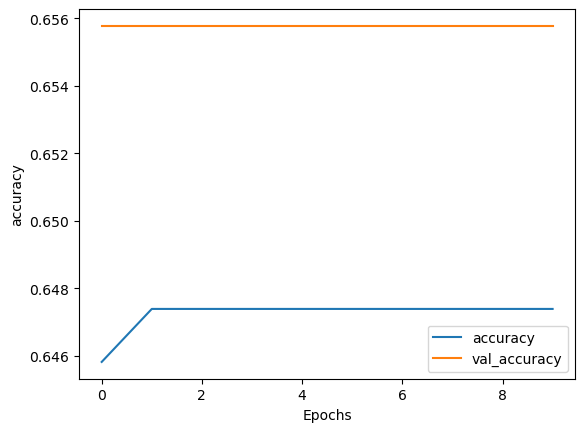

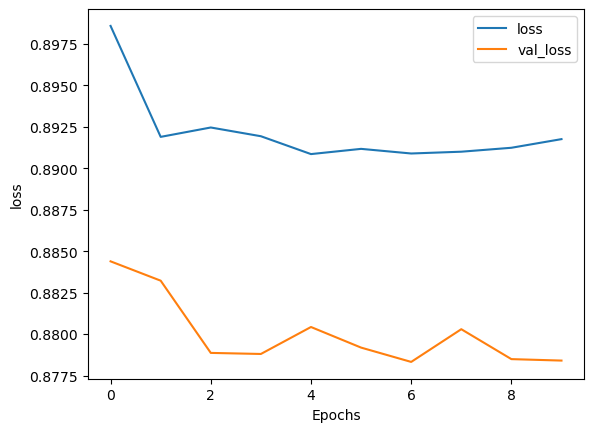

In [36]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Evaluate

In [37]:
y_pred = model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_valid

print(classification_report(y_true_classes, y_pred_classes, target_names=sentiments.values()))

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step
              precision    recall  f1-score   support

     Bearish       0.00      0.00      0.00       347
     Bullish       0.00      0.00      0.00       475
     Neutral       0.66      1.00      0.79      1566

    accuracy                           0.66      2388
   macro avg       0.22      0.33      0.26      2388
weighted avg       0.43      0.66      0.52      2388



c:\Users\manue\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manue\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manue\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For better metrics I will change the parameters increasing the LSTM units adding more layes or adjusting the dropout for excessive looss